In [1]:
__author__ = "me"
__date__ = "2015_10_13"

%pylab inline
import pandas as pd
import numpy as np
import geopandas as gp

import pylab as plt
import os

import requests
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
plt.rcParams.update(s)

import topojson

Populating the interactive namespace from numpy and matplotlib


/Users/casy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [30]:
PARQA = os.getenv('PARQA')


In [66]:
parks = gp.read_file(PARQA + '/data/parks_computed.geojson' )

In [67]:
parks.crs

{'init': u'epsg:4326'}

In [69]:
parks = parks.to_crs(epsg=2236)

In [70]:
parks.area.describe()

count    2.001000e+03
mean     6.250142e+05
std      3.966844e+06
min      2.623140e+01
25%      6.619141e+03
50%      3.267254e+04
75%      9.209570e+04
max      1.177342e+08
dtype: float64

In [71]:
6.134109e-06

6.134109e-06

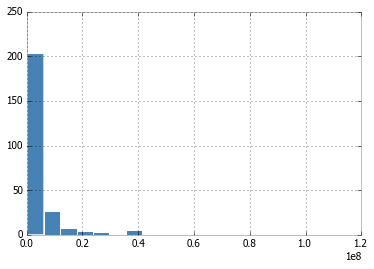

In [73]:
parks.area[parks.area>300000].hist(bins=20)

In [78]:
X = 4000000
print len(parks)
print len(parks[parks.area>X])

2001
67


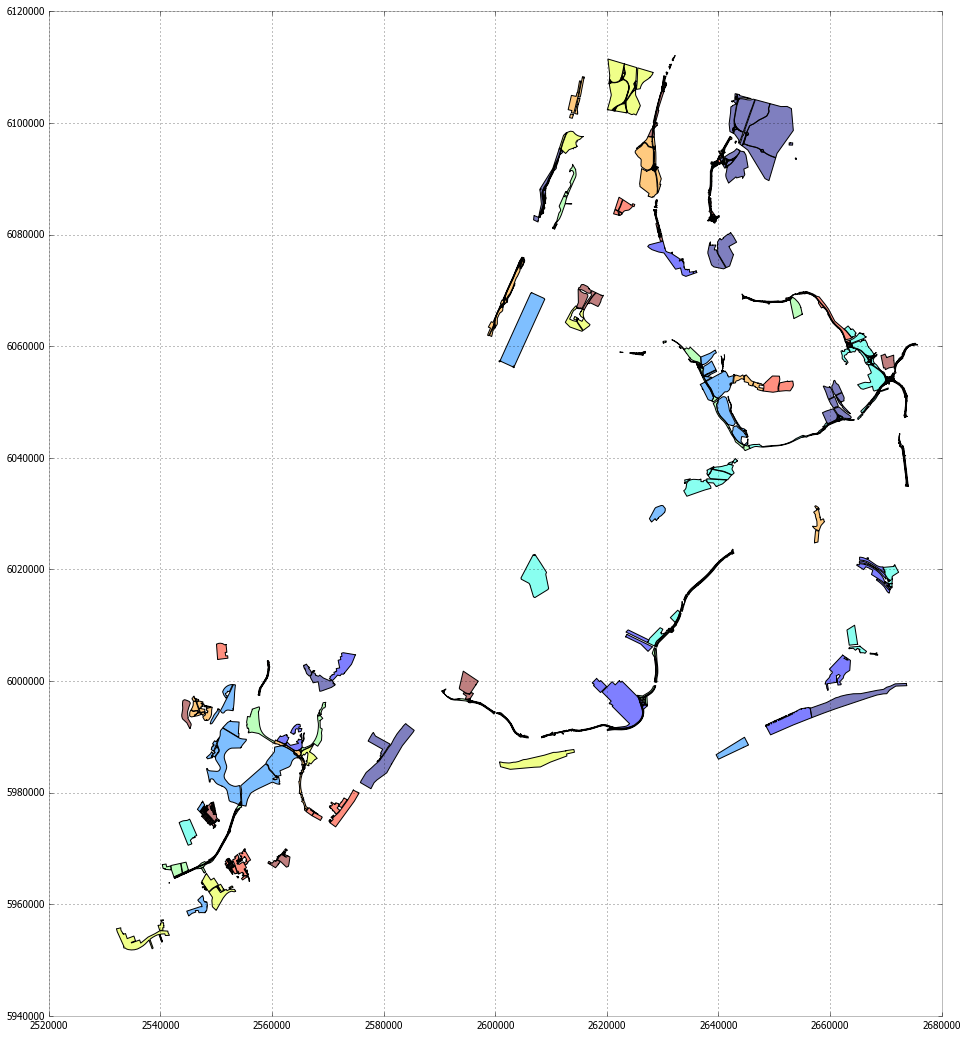

In [79]:

parks[parks.area> X].plot(figsize=(18,18));

In [93]:
parks.columns

Index([     u'BOROUGH',   u'GISPROPNUM',     u'LOCATION',   u'NYS_ASSEMB',
         u'NYS_SENATE',   u'SHAPE_STAr',   u'SHAPE_STLe',     u'SIGNNAME',
         u'TYPECATEGO',   u'US_CONGRES',   u'WATERFRONT',     u'geometry',
                 u'id', u'parkDistrict',    u'park_area'],
      dtype='object')

In [94]:
x = parks[parks.area> X].to_crs(epsg=4326)[['geometry', 'GISPROPNUM']]


In [95]:
path = PARQA + 'Parqa_tool/data/parks.json'

with open(path,'w') as f:
    f.write(x.to_json())

In [96]:
from topojson import topojson

#give it a path in and out
topojson(path,path.replace('.json','_t.json'))